# NLP_assignment 2

## Yogesh Kumar (c0852435)

In [1]:
# Read in and clean data
import nltk
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import string

stopwords = nltk.corpus.stopwords.words('english')

path=r'C:/Users/Yogi/Downloads/'

messages = pd.read_csv(path+'spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages['label'] = np.where(messages['label']=='spam', 1, 0)


def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return " ".join(text)

messages['clean_text'] = messages['text'].apply(lambda x: clean_text(x))
messages.head()

2.
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(messages['clean_text'],
                                                    messages['label'], test_size=0.2)

X_train.to_csv(path+'X_train.csv', index=False, header=True)
X_test.to_csv(path+'X_test.csv',index=False, header=True)
y_train.to_csv(path+'y_train.csv',index=False, header=True)
y_test.to_csv(path+'y_test.csv',index=False, header=True)


## Implementing TF_IDF on Random Forest Classifier

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_train_tf = tfidf_vect.fit_transform(X_train)
X_test_tf = tfidf_vect.transform(X_test)

print(X_train_tf)
print(tfidf_vect.get_feature_names())
print(X_test_tf.shape)


  (0, 12)	0.1305215467349456
  (0, 20)	0.23365117051855516
  (0, 11)	0.07811019208852882
  (0, 28)	0.08522129078428922
  (0, 17)	0.19403961573899664
  (0, 18)	0.0966270093375372
  (0, 30)	0.16015821047986506
  (0, 23)	0.19436439289921897
  (0, 14)	0.0956659857770686
  (0, 24)	0.1624279213243988
  (0, 31)	0.1015433601160494
  (0, 16)	0.1356621471009756
  (0, 15)	0.2997464826664797
  (0, 19)	0.16228036373342095
  (0, 0)	0.424115627507151
  (0, 29)	0.25321492731224543
  (0, 21)	0.3475688278006075
  (0, 25)	0.4786268869111465
  (0, 22)	0.17400706897799065
  (1, 26)	0.04302915389069457
  (1, 7)	0.09276490402987163
  (1, 6)	0.1728998119165411
  (1, 9)	0.08369949552655141
  (1, 1)	0.491689998291232
  (1, 13)	0.11488561434643722
  :	:
  (4455, 30)	0.38450713632640726
  (4455, 23)	0.07777153175973134
  (4455, 14)	0.22967448327981874
  (4455, 24)	0.32496354022255647
  (4455, 31)	0.08126161935792414
  (4455, 16)	0.32569709372624284
  (4455, 15)	0.29984585587972634
  (4455, 19)	0.1948009963216655


In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state =0)



Accuracy Score : 0.9757847533632287
Precision Score : 0.9699248120300752
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.97      0.85      0.91       152

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



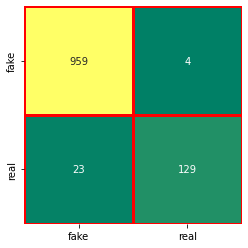

In [4]:
model.fit(X_train_tf, y_train)
pred=model.predict(X_test_tf)

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

acc1=accuracy_score(y_test,pred)
pre1=precision_score(y_test,pred)

print("Accuracy Score :",acc1)
print("Precision Score :",pre1)

import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot=True, cmap='summer', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=['fake','real'],yticklabels=['fake','real'],fmt='.4g')

print(classification_report(y_test,pred))

## Implementing Word2vec on Random Forest Classifier

In [5]:
! pip install gensim
import gensim
from gensim.models import Word2Vec
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])




C:\Users\Yogi\AppData\Local\Temp/ipykernel_37152/1448500749.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
C:\Users\Yogi\AppData\Local\Temp/ipykernel_37152/1448500749.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])


In [6]:
#print(X_train_vect[0:10])
#print(X_test_vect[0:10])
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))
        
print(X_train_vect.shape)

(4457,)


4457
(4457,)
Accuracy Score : 0.9730941704035875
Precision Score : 0.9552238805970149
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       963
           1       0.96      0.84      0.90       152

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



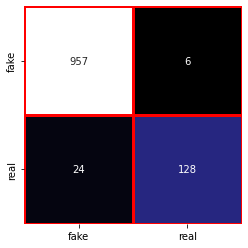

In [7]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_vect_avg,y_train.values.ravel())
pred=model_rf.predict(X_test_vect_avg)

print(len(X_train_vect_avg))
print(y_train.values.ravel().shape)

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

acc2=accuracy_score(y_test,pred)
pre2=precision_score(y_test,pred)

print("Accuracy Score :",acc2)
print("Precision Score :",pre2)

import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot=True, cmap='CMRmap', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=['fake','real'],yticklabels=['fake','real'],fmt='.4g')

print(classification_report(y_test,pred))

## Implementing doc2vec on Random Forest Classifier

In [8]:

tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]


tagged_docs[0]

d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                 vector_size=100,
                                  window=5,
                                  min_count=2)
                                                  
print(X_train[0:10]) 
X_train_doc=[]
for i in X_train:
        X_train_doc.append(i.split(" "))

print(X_train_doc[0:10])

print(X_test[0:10]) 
X_test_doc=[]
for i in X_test:
        X_test_doc.append(i.split(" "))

print(X_test_doc[0:10])   



3372           looks like found something smoke great job
2819    interflora åòits late order interflora flowers...
2258    sad story man last week bday wife didnt wish p...
1889                           gotta collect da car 6 lei
2122                                          know result
2937      hey ive booked pilates yoga lesson already haha
978                               hey pay salary de ltgt 
3402                good night dear sleepwellamptake care
2230    hey thk juz go accordin wat discussed yest lor...
502                                     check nuerologist
Name: clean_text, dtype: object
[['looks', 'like', 'found', 'something', 'smoke', 'great', 'job'], ['interflora', 'åòits', 'late', 'order', 'interflora', 'flowers', 'christmas', 'call', '0800', '505060', 'place', 'order', 'midnight', 'tomorrow'], ['sad', 'story', 'man', 'last', 'week', 'bday', 'wife', 'didnt', 'wish', 'parents', 'forgot', 'n', 'kids', 'went', 'work', 'even', 'colleagues', 'wish'], ['gotta', 'collect'

In [9]:
X_train_doc_vect = np.array([d2v_model.infer_vector(i) for i in X_train_doc])

X_test_doc_vect = np.array([d2v_model.infer_vector(i) for i in X_test_doc])
                         
print(X_train_doc_vect[0:10])
X_train_doc_vect.shape

print(X_test_doc_vect[0:10])
X_test_doc_vect.shape

[[-1.97096705e-03  1.89116603e-04  1.79397408e-03  3.21650156e-03
  -1.46501960e-04 -4.86364868e-03 -4.69636079e-03 -3.78340040e-03
  -3.67069780e-03 -2.48226710e-03 -2.55713821e-03  4.99928882e-03
   1.45393785e-03  2.49507488e-03 -8.46061084e-05  1.94053049e-04
  -2.24484736e-03 -2.98719225e-03 -1.11764995e-03  9.15783632e-04
   5.61350571e-05 -2.47923145e-03 -4.22814535e-03  3.37808905e-03
  -3.72007908e-03 -1.03709043e-03 -2.93633156e-03  1.26775028e-03
   4.27068351e-03 -1.86327007e-03 -2.60812049e-05  1.33782264e-03
   2.73997779e-04 -1.25242467e-03 -2.45185802e-04  2.73799663e-03
  -3.74487112e-03 -3.61587713e-03 -1.93792314e-03 -1.31568883e-03
   1.00927532e-03 -4.34413878e-03 -4.64724423e-03 -3.27371527e-03
   1.73319574e-03 -1.56345638e-03 -4.06962034e-04  3.15540441e-04
  -1.19444553e-03  3.85201280e-03  1.28663599e-03  8.16088344e-04
  -1.99977588e-03 -6.78795550e-05  8.40884459e-04  4.44133859e-03
   3.19875544e-03  4.99354722e-03  3.08746821e-03 -1.38380169e-03
   2.69842

(1115, 100)

In [10]:
model_doc_rf = RandomForestClassifier()
model_doc_rf.fit(X_train_doc_vect,y_train.values.ravel())
pred_doc_rf=model_doc_rf.predict(X_test_doc_vect)


(1115,)
(1115,)
Accuracy Score : 0.9112107623318386
Precision Score : 0.9649122807017544
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       963
           1       0.96      0.36      0.53       152

    accuracy                           0.91      1115
   macro avg       0.94      0.68      0.74      1115
weighted avg       0.92      0.91      0.89      1115



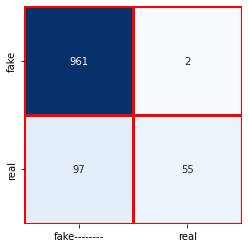

In [11]:
print(pred_doc_rf.shape)
print(y_test.shape)
acc3=accuracy_score(y_test,pred_doc_rf)
pre3=precision_score(y_test,pred_doc_rf)

print("Accuracy Score :",acc3)
print("Precision Score :",pre3)

import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred_doc_rf),annot=True, cmap='Blues', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=['fake--------','real'],yticklabels=['fake','real'],fmt='.4g')

print(classification_report(y_test,pred_doc_rf))

## Implementing Basic RNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          265888    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 275,297
Trainable params: 275,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
140/140 [==============================] - 5s 23ms/step - loss: 0.2648 - accuracy: 0.9172 - precision_m: 0.5200 - recall_m: 0.3856 - val_loss: 0.0959 - val_accuracy: 0.977

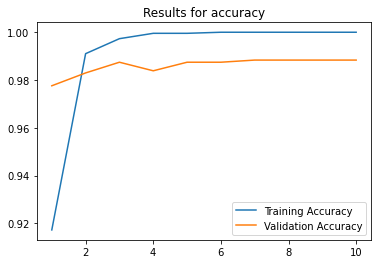

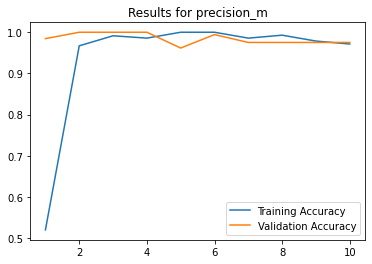

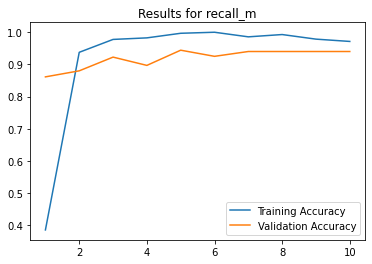

In [12]:
!pip install -U keras

from keras.preprocessing.text import Tokenizer # simple pre-process function from genesis celan and tokenize our data
from keras_preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
 
X_train_seq[0]


X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)


X_train_seq_padded[0]


import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Construct a simple RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

11.
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

12.

# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

# Summary:
 

In [13]:
print(f"The accuracy and precision score of TF_IDF on Random forest are {acc1} and {pre1} respectively.\n The accuracy and precision score of word2vec on Random forest is {acc2} and {pre2} respectively.\n The accuracy and precision score of doc2vec on Random forest is {acc3} and {pre3} respectively.\n The accuracy and precision score of basic RNN  is {np.mean(acc)} and 0.9786 respectively.")

The accuracy and precision score of TF_IDF on Random forest are 0.9757847533632287 and 0.9699248120300752 respectively.
 The accuracy and precision score of word2vec on Random forest is 0.9730941704035875 and 0.9552238805970149 respectively.
 The accuracy and precision score of doc2vec on Random forest is 0.9112107623318386 and 0.9649122807017544 respectively.
 The accuracy and precision score of basic RNN  is 0.9208761274814605 and 0.9786 respectively.


# Conclusion: TF_IDF is best technique

we can conclude that TF_IDF is best algorithm as we can see accuracy is more than other models. The advantage of TF-IDF is its simplicity and ease of use. It is easy to compute, has low computational cost, and is an easy starting point for similarity computation. 
 TF-IDF is a algorithm that uses the frequency of words to determine how relevant those words are to a particular document. This is a relatively simple than other algorithms.